In [1]:
%matplotlib inline
import numpy as np
import pylab as pl
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.interpolate
import random

from numpy import random
import matplotlib.image as mpimg
from scipy.optimize import curve_fit

## Formula that describes the ellipse on the Armenteros-odolanski plot.
def func(x, m_Ks, m_pi):
    return np.sqrt(abs((-m_Ks)**2*(1.-x**2)/4.-m_pi**2))

In [2]:
data=np.loadtxt("KS.dat") #loading the actual collision data
data=data[(np.arange(data.shape[0])[data[:,1]>115.5]),:] #cutting off the Lambdas and leaving only KS

realdata=data[:,(2,1)] #extracting just the pt and alpha from the real collision data
realdata=np.array(realdata)

In [74]:
kaon=495
pion=150

for i in range(20):
    # Creating the histogram of the real data.
    a = realdata[:,0]
    counts, bins = np.histogram(a, bins=100, density=True)
    cum_counts = np.cumsum(counts)
    bin_widths = (bins[1:] - bins[:-1])

    # Interpolating the histogram and finding the distribution.
    x = cum_counts*bin_widths
    y = bins[1:]
    inverse_density_function = scipy.interpolate.interp1d(x, y)
    #Generating alpha values using the same distribution.
    alpha=inverse_density_function( random.uniform( x[0], x[-1],data.shape[0]) )
    pt=func(alpha,kaon,pion) #finding the y-coordinate of the bin where an event belongs
    pt=np.random.normal(pt,pt*0.015)
    AP=np.column_stack((alpha,pt))
    np.savetxt('ToyKS-'+str(i)+'.txt',AP,delimiter=',')


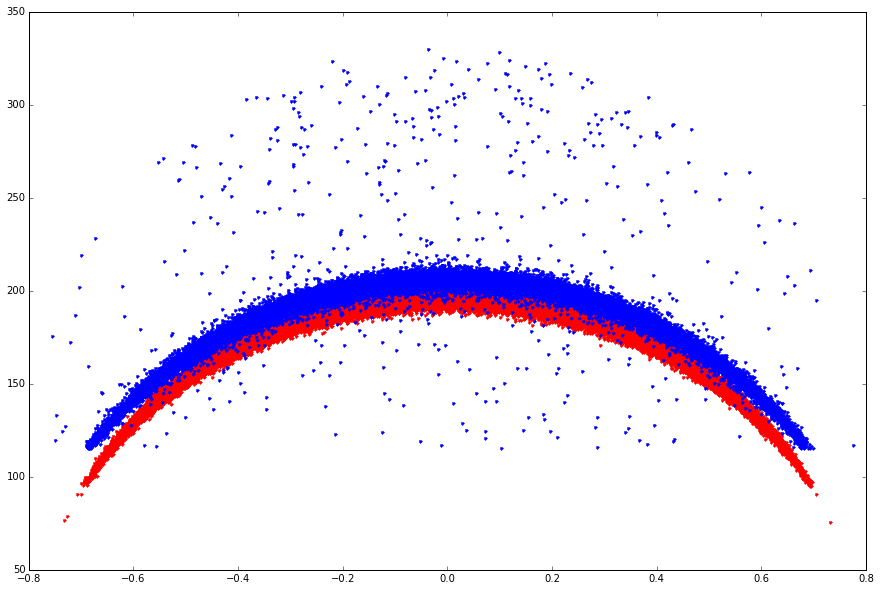

In [83]:
AP=np.loadtxt('ToyKS-5.txt',delimiter=',')
plt.figure(figsize=(15,10))
plt.plot(AP[:,0],AP[:,1],'.r')
plt.plot(realdata[:,0],realdata[:,1],'.b')

(array([  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   6.00000000e+00,
          7.00000000e+00,   1.90000000e+01,   3.20000000e+01,
          7.50000000e+01,   1.05000000e+02,   1.20000000e+02,
          1.46000000e+02,   1.41000000e+02,   1.64000000e+02,
          2.03000000e+02,   2.49000000e+02,   2.77000000e+02,
          3.36000000e+02,   3.55000000e+02,   4.28000000e+02,
          4.53000000e+02,   4.57000000e+02,   5.73000000e+02,
          6.23000000e+02,   6.51000000e+02,   7.35000000e+02,
          8.73000000e+02,   9.73000000e+02,   1.03000000e+03,
          1.17700000e+03,   1.32800000e+03,   1.50800000e+03,
          1.62100000e+03,   2.03200000e+03,   2.21200000e+03,
          2.71300000e+03,   3.15000000e+03,   4.47200000e+03,
        

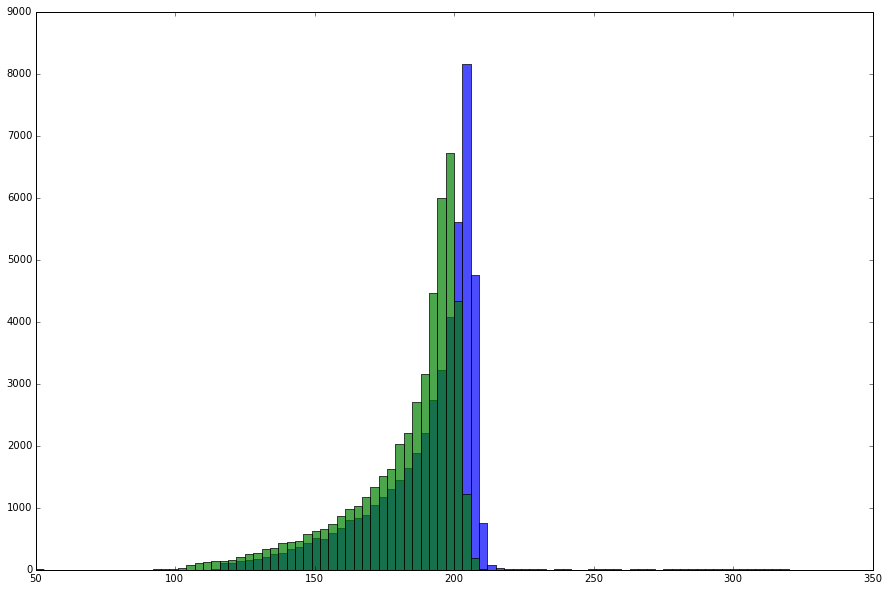

In [45]:
plt.figure(figsize=(15,10))
plt.hist(realdata[:,1],bins=100,alpha=0.7,range=[50,350])
plt.hist(pt[0],bins=100,alpha=0.7,range=[50,350])

In [71]:
# Creating the histogram of the real data.
a = realdata[:,0]
counts, bins = np.histogram(a, bins=100, density=True)
cum_counts = np.cumsum(counts)
bin_widths = (bins[1:] - bins[:-1])

# Interpolating the histogram and finding the distribution.
x = cum_counts*bin_widths
y = bins[1:]
inverse_density_function = scipy.interpolate.interp1d(x, y)
#Generating alpha values using the same distribution.
alpha=inverse_density_function( random.uniform( x[0], x[-1],data.shape[0]) )
pt=func(alpha,kaon,pion) #finding the y-coordinate of the bin where an event belongs
pt=np.random.normal(pt,pt*0.015)
AP=np.column_stack((alpha,pt))

In [72]:
AP

array([[  4.17694149e-01,   1.64905422e+02],
       [  1.11553673e-01,   2.01647330e+02],
       [  1.05347196e-01,   1.94860075e+02],
       ..., 
       [  2.60851981e-01,   1.89097835e+02],
       [ -1.88451174e-01,   1.92476199e+02],
       [  3.05680796e-01,   1.81342205e+02]])